# Task1: Titanic Survival Classification

## Objective 1: Load the Titanic Dataset

In [5]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the Titanic dataset
df = pd.read_csv("C:/Users/luqma/Downloads/archive/Titanic-Dataset.csv")

In [7]:
# Display the first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Objective 2: Exploratory Data Analysis (EDA)

In [8]:
# Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Describe numerical features
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Check unique values in categorical columns
df['Sex'].unique(), df['Embarked'].unique()

(array(['male', 'female'], dtype=object),
 array(['S', 'C', 'Q', nan], dtype=object))

## Objective 3: Data Cleaning & Preprocessing

In [12]:
#Import Tool
from sklearn.preprocessing import LabelEncoder

In [13]:
# Drop columns not useful for prediction
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [14]:
# Fill missing Age values with median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [15]:
# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [16]:
# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [17]:
# Check the cleaned data
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Objective 4: Splitting Features and Target

In [18]:
# Import Tool for splitting
from sklearn.model_selection import train_test_split

In [19]:
# Features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

In [20]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Show training data shape
X_train.shape, X_test.shape

((712, 7), (179, 7))

## Objective 5: Training the Model With Random Forest

In [22]:
# Classification model
from sklearn.ensemble import RandomForestClassifier

In [23]:
# Initialize RandomForest model
model = RandomForestClassifier(random_state=42)

In [24]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Predict using your trained Random Forest model
model_preds = model.predict(X_test)

## Training Model With Logistic Regression

In [26]:
# Train Logistic Regression
from sklearn.linear_model import LogisticRegression

In [27]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
# Predict and evaluate
log_preds = log_model.predict(X_test)

## Objective 6: Model Prediction and Evaluation of Random Forest

In [29]:
# Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
# Predict on test data
y_pred = model.predict(X_test)

In [31]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8212290502793296

In [32]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[92, 13],
       [19, 55]])

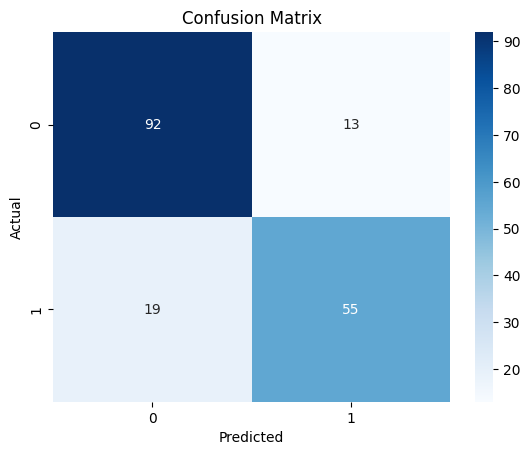

In [33]:
# Heatmap of confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



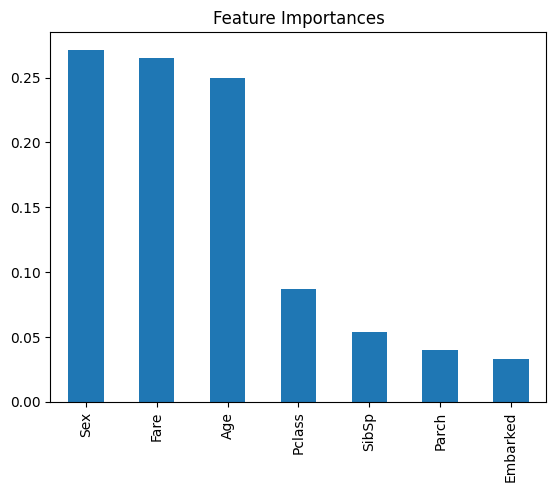

In [35]:
# Check which features are most important
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importances")
plt.show()

## Improved Accuracy of Random Forest After Hypertuning

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
}

In [38]:
# GridSearchCV to find best parameters
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

In [39]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [40]:
# Best model
best_model = grid_search.best_estimator_

In [41]:
# Predict with tuned model
model_preds_tuned = best_model.predict(X_test)

In [42]:
# Evaluate new accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
improved_accuracy = accuracy_score(y_test, model_preds_tuned)
print("🔁 Improved Random Forest Accuracy:", round(improved_accuracy * 100, 2), "%")

print("\nClassification Report (Tuned):")
print(classification_report(y_test, model_preds_tuned))

🔁 Improved Random Forest Accuracy: 81.56 %

Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



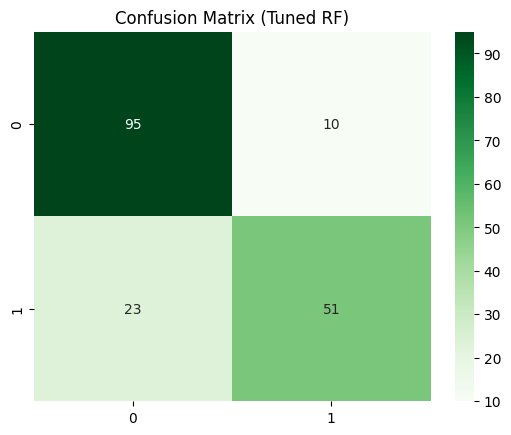

In [44]:
#Confusion Matrix heatmap
sns.heatmap(confusion_matrix(y_test, model_preds_tuned), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (Tuned RF)")
plt.show()

In [46]:
baseline_accuracy = accuracy_score(y_test, model_preds)
print("🔹 Baseline RF Accuracy:", round(baseline_accuracy * 100, 2), "%")

🔹 Baseline RF Accuracy: 82.12 %


## Model Prediction And Evaluation Of Logistic Regression

In [47]:
from sklearn.metrics import accuracy_score, classification_report

In [48]:
print("📊 Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))

📊 Logistic Regression Accuracy: 0.8100558659217877


In [49]:
print(classification_report(y_test, log_preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [50]:
# Step 2: Generate the confusion matrix
cm_log = confusion_matrix(y_test, log_preds)

In [51]:
# Step 3: Print the confusion matrix values
print("Confusion Matrix for Logistic Regression:")
print(cm_log)

Confusion Matrix for Logistic Regression:
[[90 15]
 [19 55]]


C:\Users\luqma\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


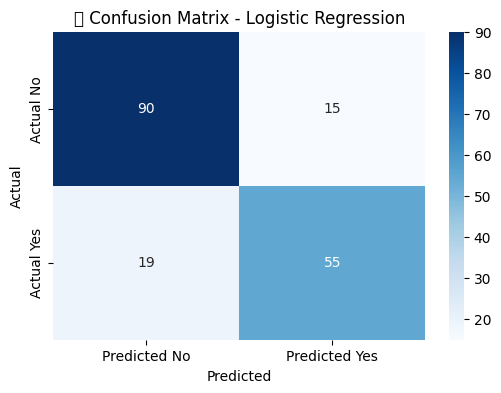

In [52]:
# Step 4: Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title("🔍 Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Comparsion Between Models

In [53]:
# Random Forest vs Logistic
model_acc = accuracy_score(y_test, model_preds)
log_acc = accuracy_score(y_test, log_preds)

print(f"Random Forest Accuracy: {model_acc:.3f}")
print(f"Logistic Regression Accuracy: {log_acc:.3f}")

Random Forest Accuracy: 0.821
Logistic Regression Accuracy: 0.810


## Objective 7: Sample Prediction

In [54]:
# Create sample input as a DataFrame with correct columns and encoding
sample = pd.DataFrame([{
    'Pclass': 3,
    'Sex': 0,
    'Age': 25,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 7.5,
    'Embarked': 2  # Adjust based on your actual encoding
}])

In [55]:
# Get prediction
model.predict(sample)

array([1])

In [56]:
# Get survival probabilities
model.predict_proba(sample)

array([[0.19, 0.81]])

In [57]:
prediction = model.predict(sample)[0]
if prediction == 1:
    print(" Passenger is predicted to survive.")
else:
    print(" Passenger is predicted *not* to survive.")

 Passenger is predicted to survive.


## Objective 7: Visualization

In [58]:
# Import ROC and AUC
from sklearn.metrics import roc_auc_score, roc_curve

In [59]:
# Predict probabilities
y_probs = model.predict_proba(X_test)[:,1]

In [60]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

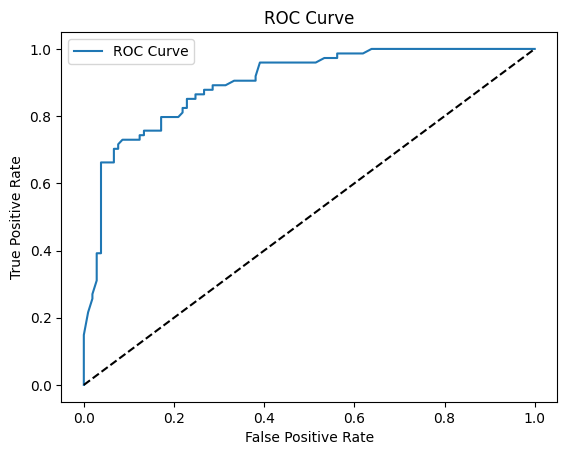

In [61]:
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()